In [2]:
import numpy as np
from sklearn.linear_model import LinearRegression
import scipy.io as sio
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [12]:
data_folder = "C:\BCI_RECORDINGS\\17-08-22\TK\Sub318324886001"

# need to take the features matrix and trainingvec
all_features = sio.loadmat(data_folder + '\AllDataInFeatures.mat')['AllDataInFeatures']
all_labels = sio.loadmat(data_folder + '\\trainingVec.mat')['trainingVec'].T
classes_map = {'idle': 1, 'left': 2, 'right': 3}

features_lables = np.concatenate((all_labels, all_features), axis=1)
# param
selected_feature = 20 # csp first eigenvalue

df = pd.DataFrame(features_lables,columns=['Class'] + [f'F{i}' for i in range(1, 224)])
plt.style.use('ggplot')


Text(0, 0.5, 'Frequency')

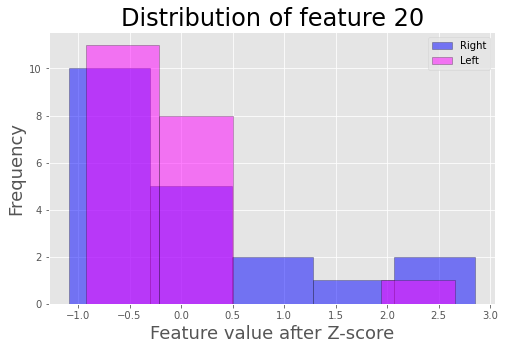

In [13]:
df[df['Class'] == classes_map['right']][f'F{selected_feature}'].plot(kind='hist', color='blue', edgecolor='black', alpha=0.5, figsize=(8, 5), bins=5)
df[df['Class'] == classes_map['left']][f'F{selected_feature}'].plot(kind='hist', color='magenta', edgecolor='black', alpha=0.5, figsize=(8, 5), bins=5)
plt.legend(labels=['Right', 'Left'])
plt.title(f'Distribution of feature {selected_feature}', size=24)
plt.xlabel('Feature value after Z-score', size=18)
plt.ylabel('Frequency', size=18)

Text(0, 0.5, 'z_score')

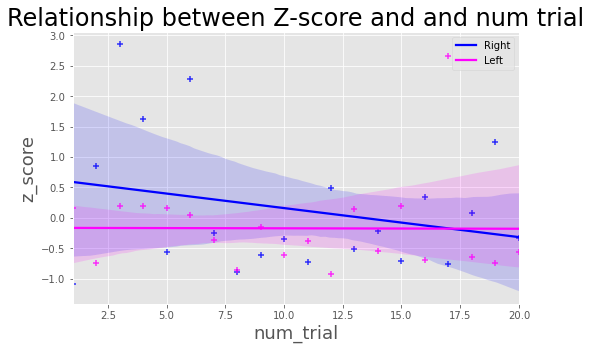

In [14]:
x_axis = np.arange(1, 21)

sample_right = df[df['Class'] == classes_map['right']]
sample_left = df[df['Class'] == classes_map['left']]

# regression plot using seaborn
fig = plt.figure(figsize=(8, 5))
sns.regplot(x=x_axis, y=sample_right[f'F{selected_feature}'], color='blue', marker='+')
sns.regplot(x=x_axis, y=sample_left[f'F{selected_feature}'], color='magenta', marker='+')

# Legend, title and labels.
plt.legend(labels=['Right', 'Left'])
plt.title('Relationship between Z-score and and num trial', size=24)
plt.xlabel('num_trial', size=18)
plt.ylabel('z_score', size=18)